# Notebook for Pure Production Chemical Reaction Network

Pure Production Chemical Reaction Network: $ø \xrightarrow{\theta} S$.

In [1]:
import sys
sys.path.append('../')

import numpy as np
import torch
import matplotlib.pyplot as plt

import neuralnetwork
import convert_csv
import plot
import save_load_MDN

from scipy.stats import poisson

from CRN1_pure_production import propensities_pure_production as propensities

## Importing data

In [2]:
FILE_NAME = 'data'
CRN_NAME = 'pure_production'
NUM_PARAMS = 1

In [3]:
X_train1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train1.csv')
X_train2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train2.csv')
X_train3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_train3.csv')
y_train1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train1.csv')
y_train2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train2.csv')
y_train3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_train3.csv')
X_valid1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid1.csv')
X_valid2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid2.csv')
X_valid3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_valid3.csv')
y_valid1 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid1.csv')
y_valid2 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid2.csv')
y_valid3 = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_valid3.csv')
X_test = convert_csv.csv_to_tensor(f'{FILE_NAME}/X_{CRN_NAME}_test.csv')
y_test = convert_csv.csv_to_tensor(f'{FILE_NAME}/y_{CRN_NAME}_test.csv')

train_data1 = [X_train1, y_train1]
valid_data1 = [X_valid1, y_valid1]
train_data2 = [X_train2, y_train2]
valid_data2 = [X_valid2, y_valid2]
train_data3 = [X_train3, y_train3]
valid_data3 = [X_valid3, y_valid3]

## Hyperparameters

In [4]:
LR = 0.005
N_HIDDEN = 128
N_ITER = 700
BATCHSIZE = 32
MIXTURE = 'NB'
N_COMPS = 4

## Training models

We train 3 different models to compare their accuracy.

In [5]:
model1 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS, n_hidden=N_HIDDEN, mixture=MIXTURE)
model2 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS, n_hidden=N_HIDDEN, mixture=MIXTURE)
model3 = neuralnetwork.NeuralNetwork(n_comps=N_COMPS, n_params=NUM_PARAMS, n_hidden=N_HIDDEN, mixture=MIXTURE)

Mixture Density Network created.
Mixture Density Network created.
Mixture Density Network created.


In [6]:
train_losses1, valid_losses1 = neuralnetwork.train_NN(model1, train_data1, valid_data1, loss=neuralnetwork.loss_kldivergence, max_rounds=N_ITER, lr=LR, batchsize=BATCHSIZE)
train_losses2, valid_losses2 = neuralnetwork.train_NN(model2, train_data2, valid_data2, loss=neuralnetwork.loss_kldivergence, max_rounds=N_ITER, lr=LR, batchsize=BATCHSIZE)
train_losses3, valid_losses3 = neuralnetwork.train_NN(model3, train_data3, valid_data3, loss=neuralnetwork.loss_kldivergence, max_rounds=N_ITER, lr=LR, batchsize=BATCHSIZE)

Training ...: 100%|█████████▉| 699/700 [06:47<00:00,  1.71it/s]


Learning rate: 2.5177519986929707e-08,
Train loss: 0.0016403633635491133,
 Valid loss: 0.0017068099696189165


Training ...: 100%|█████████▉| 699/700 [06:11<00:00,  1.88it/s]


Learning rate: 2.5177519986929707e-08,
Train loss: 0.0016301062423735857,
 Valid loss: 0.0016591474413871765


Training ...: 100%|█████████▉| 699/700 [06:05<00:00,  1.91it/s]

Learning rate: 2.5177519986929707e-08,
Train loss: 0.0016060586785897613,
 Valid loss: 0.00163812015671283


In [7]:
for i, model in enumerate([model1, model2, model3]):
    save_load_MDN.save_MDN_model(model, f'CRN1_model{i+1}.pt')

## Loading models

In [5]:
model1 = save_load_MDN.load_MDN_model('saved_models/CRN1_model1.pt')
model2 = save_load_MDN.load_MDN_model('saved_models/CRN1_model2.pt')
model3 = save_load_MDN.load_MDN_model('saved_models/CRN1_model3.pt')

Mixture Density Network created.
Mixture Density Network created.
Mixture Density Network created.


In [8]:
# Compute losses

print("Model 1")
print(f"KLD : {neuralnetwork.mean_loss(X_test, y_test, model1, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_test, y_test, model1, loss=neuralnetwork.loss_hellinger)}')

print("\nModel 2")
print(f"KLD : {neuralnetwork.mean_loss(X_test, y_test, model2, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_test, y_test, model2, loss=neuralnetwork.loss_hellinger)}')

print("\nModel 3")
print(f"KLD : {neuralnetwork.mean_loss(X_test, y_test, model3, loss=neuralnetwork.loss_kldivergence)}")
print(f'Hellinger : {neuralnetwork.mean_loss(X_test, y_test, model3, loss=neuralnetwork.loss_hellinger)}')


Model 1
KLD : 0.001650331192649901
Hellinger : 0.020478352904319763

Model 2
KLD : 0.00162710330914706
Hellinger : 0.020358989015221596

Model 3
KLD : 0.0016102627851068974
Hellinger : 0.0202411487698555


## Probability mass function

Given an initial condition of 0 $S$, the population of $S$ at any later time is a random integer sampled from a Poisson distribution :

$$p(x; t, \theta) = \frac{(\theta t)^xe^{-\theta t}}{x!}$$

In [9]:
def pure_production_distribution(x, params):
    t, theta = params[0], params[1]
    return poisson.pmf(x, t*theta)

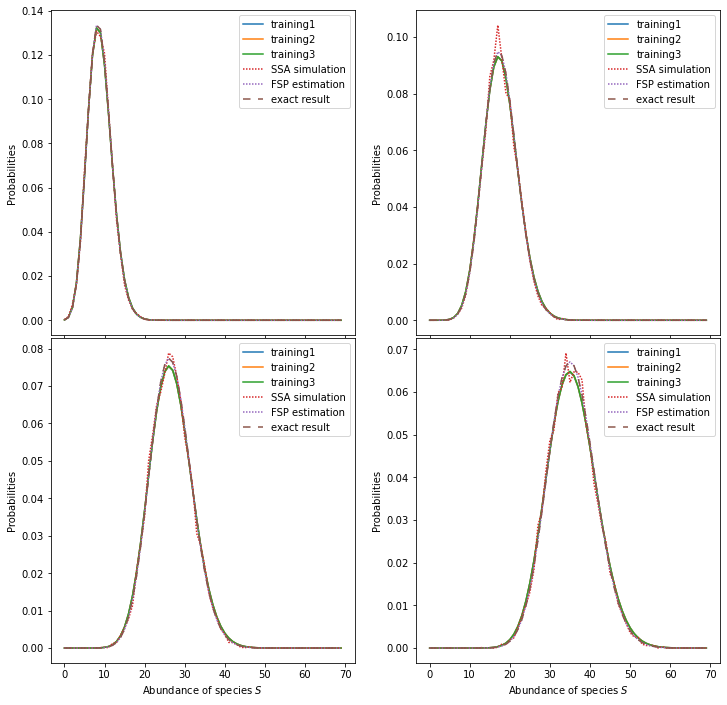

In [10]:
plot.multiple_plots(to_pred=[X_test[992+k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound=4*[70], 
                    time_windows=np.array([20]),
                    n_comps=N_COMPS,
                    plot_test_result=(True, [y_test[992+k,:] for k in range(4)]),
                    plot_exact_result=(True, pure_production_distribution),
                    plot_fsp_result=(True,
                                    propensities.stoich_mat,
                                    propensities.propensities,
                                    None,
                                    70,
                                    propensities.init_state,
                                    propensities.ind_species,
                                    1,
                                    0),
                    save=(False, ''))

For a time further in the future than the training range:

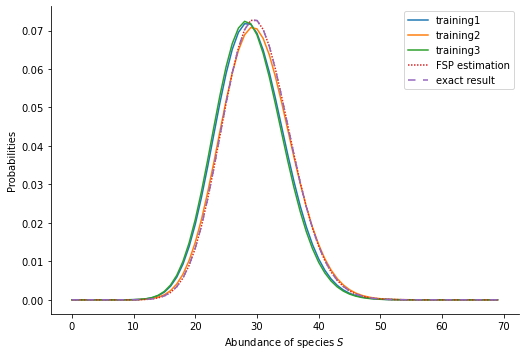

In [11]:
plot.plot_model(to_pred=torch.tensor([30., 1.]), 
                models=[model1, model2, model3], 
                up_bound=70,
                time_windows=np.array([30]),
                n_comps=N_COMPS,
                plot_exact_result=(True, pure_production_distribution),
                plot_fsp_result=(True,
                                propensities.stoich_mat,
                                propensities.propensities,
                                None,
                                70,
                                propensities.init_state,
                                propensities.ind_species,
                                1,
                                0),
                save=(False, ''))

## Sentivity of the likelihood

We set $p(-1; t, \theta) = 0$ by convention.

$$\nabla_{\theta} p(x; t, \theta) = t \big[ p(x-1;t,\theta) - p(x;t,\theta) \big]$$

In [12]:
def pure_production_sensitivity(x, params):
    t, theta = params[0], params[1]
    return t * (poisson.pmf(x-1, theta*t) - poisson.pmf(x, theta*t))

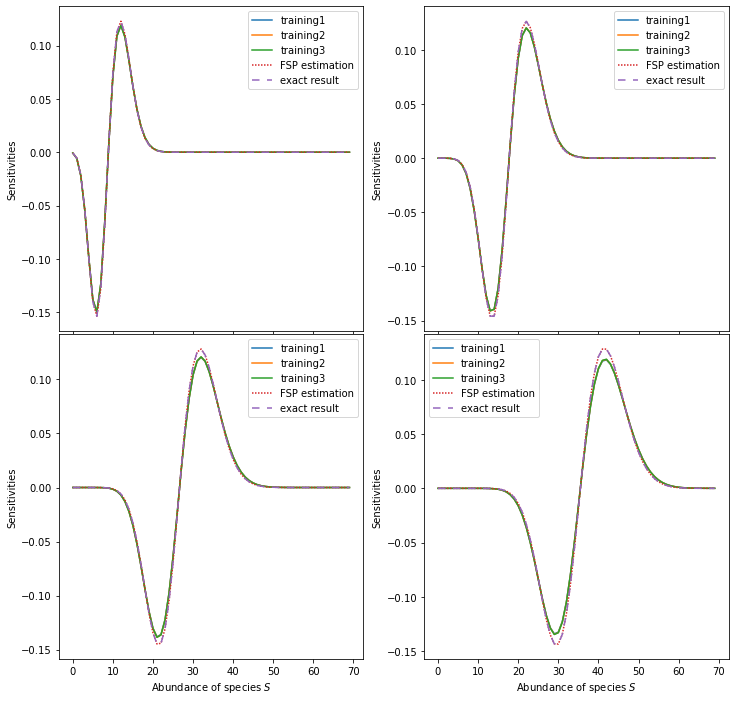

In [13]:
plot.multiple_plots(to_pred=[X_test[992+k,:] for k in range(4)], 
                    models=[model1, model2, model3], 
                    up_bound=[70]*4,
                    time_windows=np.array([20]),
                    n_comps=N_COMPS,
                    index_names=('Sensitivities', r'Abundance of species $S$'),
                    plot_exact_result=(True, pure_production_sensitivity),
                    plot_fsp_result=(True,
                                    propensities.stoich_mat,
                                    propensities.propensities,
                                    None,
                                    70,
                                    propensities.init_state,
                                    propensities.ind_species,
                                    1,
                                    0),
                    plot=('sensitivities', 0),
                    save=(False, ''))

For a time further in the future than the training range:

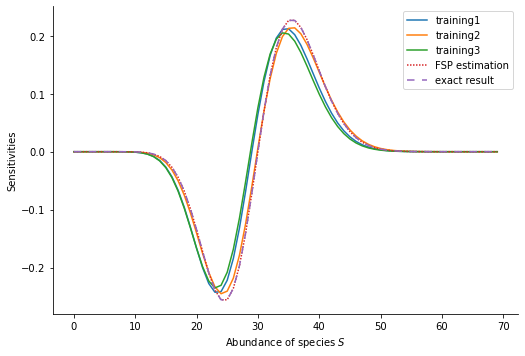

In [14]:
plot.plot_model(to_pred=torch.tensor([30., 1.]), 
                models=[model1, model2, model3], 
                up_bound=70, 
                time_windows=np.array([30]),
                n_comps=N_COMPS,
                plot_exact_result=(True, pure_production_sensitivity),
                index_names=('Sensitivities', r'Abundance of species $S$'),
                plot_fsp_result=(True,
                                propensities.stoich_mat,
                                propensities.propensities,
                                None,
                                70,
                                propensities.init_state,
                                propensities.ind_species,
                                1,
                                0),
                plot=('sensitivities', 0),
                save=(False, ''))

## Fisher information

$$\mathcal{I}_t^\theta = \frac{t}{\theta}$$

In [15]:
def exact_fi(t, params):
    return t/params[0]

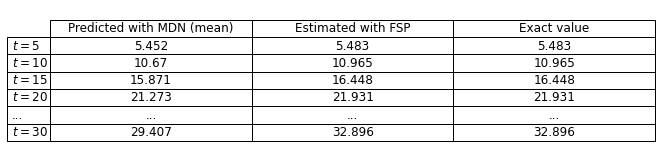

In [16]:
plot.fi_table(time_samples=np.array([5, 10, 15, 20, 30]),
                params=X_test[996, 1:].numpy(), 
                ind_param=0,
                time_windows=np.array([30]),
                up_bound=200,
                models=(True, [model1, model2, model3], N_COMPS), 
                plot_exact_result=(True, exact_fi),
                plot_fsp_result=(True,
                                propensities.stoich_mat,
                                propensities.propensities,
                                None,
                                70,
                                propensities.init_state,
                                propensities.ind_species,
                                1,
                                0),
                out_of_bounds_index=4,
                save=(False, ''))

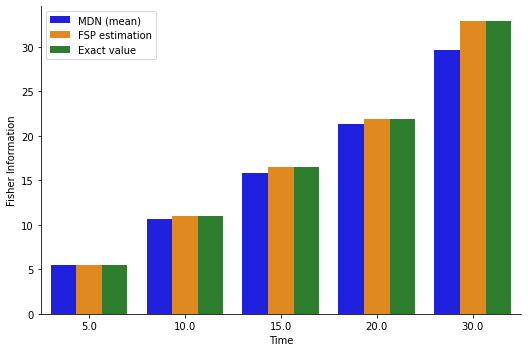

In [18]:
plot.fi_barplots(time_samples=np.array([5, 10, 15, 20, 30]),
                params=X_test[996,1:].numpy(), 
                ind_param=0,
                time_windows=np.array([30]),
                up_bound=200,
                models=(True, [model1, model2, model3], N_COMPS),
                plot_exact_result=(True, exact_fi),
                plot_fsp_result=(True,
                                propensities.stoich_mat,
                                propensities.propensities,
                                None,
                                70,
                                propensities.init_state,
                                propensities.ind_species,
                                1,
                                0),
                save=(False, 'CRN1_SI_bars.pdf'),
                colors=['blue', 'darkorange', 'forestgreen'])